In [12]:
#/Users/apichet/package.html

In [19]:
pip install ace_tools


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
from bs4 import BeautifulSoup
import json
from IPython.display import display

# Load the HTML file
with open('/Users/apichet/package.html', 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

# Find all script tags
script_tags = soup.find_all('script')

# Loop through script tags to find the correct one containing the vehicle data
data = None
for script in script_tags:
    if 'var vehicleMap' in script.text:
        data = script.text
        break

if data:
    # Extract the JSON part from the script tag
    json_data = data[data.find('{'):data.rfind('}')+1]

    # Load the JSON data
    vehicle_dict = json.loads(json_data)

    # Extract the vehicle data into a list
    vehicle_data = []
    for make, models in vehicle_dict.items():
        for model, years in models.items():
            for year, variants in years.items():
                for variant, price in variants.items():
                    vehicle_data.append([make, model, year, variant, price])

    # Create a DataFrame
    df = pd.DataFrame(vehicle_data, columns=['Make', 'Model', 'Year', 'Variant', 'Price'])

    # Display the DataFrame
    display(df)
else:
    print("No data found in the script tags.")

No data found in the script tags.


In [28]:
from bs4 import BeautifulSoup
import pandas as pd

# อ่านไฟล์ HTML
file_path = '/Users/apichet/package.html'
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# สร้าง BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# ฟังก์ชันเพื่อดึงข้อมูลที่ต้องการจาก HTML
def extract_data_from_html(soup):
    packages = []
    car_model_tag = soup.find('span', id='ContentPlaceHolder_lbNavCarDetail')
    car_model = car_model_tag.text.strip() if car_model_tag else 'N/A'
    
    for div in soup.find_all('div', class_='row line-bt selectProduct'):
        package_name = div.get('data-title', 'N/A')
        price = div.get('data-offerprice', 'N/A').replace('฿', '').replace('<span>', '').replace('</span>', '').strip()
        insurance_type = div.get('data-fix', 'N/A')
        
        packages.append({
            'Package Name': package_name,
            'Insurance Type': insurance_type,
            'Price': price,
            'Car Model': car_model
        })
    return packages

# ดึงข้อมูล
packages = extract_data_from_html(soup)

# สร้าง DataFrame
df = pd.DataFrame(packages)

# แสดง DataFrame
df

""


In [30]:
from bs4 import BeautifulSoup
import pandas as pd

# อ่านไฟล์ HTML
file_path = '/Users/apichet/package.html'
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# สร้าง BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# ตรวจสอบโครงสร้าง HTML ที่อ่านเข้ามา
print(soup.prettify()[:1000])  # พิมพ์ 1000 ตัวอักษรแรกของ HTML เพื่อดูโครงสร้าง

# ฟังก์ชันเพื่อดึงข้อมูลที่ต้องการจาก HTML
def extract_data_from_html(soup):
    packages = []
    car_model_tag = soup.find('span', id='ContentPlaceHolder_lbNavCarDetail')
    car_model = car_model_tag.text.strip() if car_model_tag else 'N/A'
    
    for div in soup.find_all('div', class_='row line-bt selectProduct'):
        package_name = div.get('data-title', 'N/A')
        price = div.get('data-offerprice', 'N/A').replace('฿', '').replace('<span>', '').replace('</span>', '').strip()
        insurance_type = div.get('data-fix', 'N/A')
        
        packages.append({
            'Package Name': package_name,
            'Insurance Type': insurance_type,
            'Price': price,
            'Car Model': car_model
        })
    return packages

# ดึงข้อมูล
packages = extract_data_from_html(soup)

# สร้าง DataFrame
df = pd.DataFrame(packages)

# แสดง DataFrame
df

<script>
</script>


""


In [32]:
from bs4 import BeautifulSoup

# อ่านไฟล์ HTML
file_path = '/Users/apichet/package.html'
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# สร้าง BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# พิมพ์ข้อมูลบางส่วนของ HTML เพื่อดูโครงสร้าง
print(soup.prettify()[:2000])

<script>
</script>


In [34]:
from bs4 import BeautifulSoup

# อ่านไฟล์ HTML
file_path = '/Users/apichet/package.html'
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# สร้าง BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# พิมพ์ข้อมูลบางส่วนของ HTML เพื่อดูโครงสร้าง
print(soup.prettify()[:2000])

<script>
</script>


In [37]:
from bs4 import BeautifulSoup
import pandas as pd

# อ่านไฟล์ HTML
file_path = '/Users/apichet/package.html'
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# สร้าง BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# ฟังก์ชันเพื่อดึงข้อมูลที่ต้องการจาก HTML
def extract_data_from_html(soup):
    packages = []
    car_model_tag = soup.find('span', id='ContentPlaceHolder_lbNavCarDetail')
    if car_model_tag:
        print(f"Car Model Tag: {car_model_tag}")
    else:
        print("Car Model Tag not found")
        
    car_model = car_model_tag.text.strip() if car_model_tag else 'N/A'
    
    for div in soup.find_all('div', class_='row line-bt selectProduct'):
        package_name = div.get('data-title', 'N/A')
        price = div.get('data-offerprice', 'N/A').replace('฿', '').replace('<span>', '').replace('</span>', '').strip()
        insurance_type = div.get('data-fix', 'N/A')
        
        packages.append({
            'Package Name': package_name,
            'Insurance Type': insurance_type,
            'Price': price,
            'Car Model': car_model
        })
    return packages

# ดึงข้อมูล
packages = extract_data_from_html(soup)

# สร้าง DataFrame
df = pd.DataFrame(packages)

# แสดง DataFrame
print(df.head())

Car Model Tag not found
Empty DataFrame
Columns: []
Index: []


In [40]:
from bs4 import BeautifulSoup
import pandas as pd

# อ่านไฟล์ HTML
file_path = '/Users/apichet/package.html'
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# สร้าง BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# พิมพ์ HTML ทั้งหมดเพื่อตรวจสอบ
print(soup.prettify()[:2000])  # พิมพ์เฉพาะ 2000 ตัวอักษรแรกเพื่อดูโครงสร้าง


<body>
 var vehicleMap = { "Alfa Romeo": { "156 (2000cc)": { "2002": { "Mac": 83969, "ไม่แน่ใจ": 63877, "Sport Mac": 63877 }, "2008": { "ไม่แน่ใจ": 63883, "Speciale II Mac": 63883, "Platino Mac": 83984 }, "2007": { "Mac": 83983, "Platino Mac": 83982, "ไม่แน่ใจ": 63882, "Speciale II Mac": 63882 }, "2004": { "Speciale II Mac": 83976, "Speciale I Mac": 83974, "ไม่แน่ใจ": 63879, "Sport Mac": 63879, "Mac": 83973, "Platino Mac": 83977 }, "2005": { "Mac": 83978, "Platino Mac": 83979, "ไม่แน่ใจ": 63880, "Speciale II Mac": 63880 }, "2006": { "Platino Mac": 83980, "Mac": 83981, "ไม่แน่ใจ": 63881, "Speciale II Mac": 63881 }, "2009": { "Platino Mac": 83985, "ไม่แน่ใจ": 63884, "Speciale II Mac": 63884 }, "2003": { "Speciale I Mac": 83972, "ไม่แน่ใจ": 63878, "Sport Mac": 63878, "Platino Mac": 83971, "Mac": 83970 }, "2010": { "ไม่แน่ใจ": 63885, "Speciale II Mac": 63885 }, "2001": { "Mac": 83967, "ไม่แน่ใจ": 63876, "Sport Mac": 63876 } }, "Spider (2000cc)": { "2002": { "ไม่แน่ใจ": 63917, "Convert. Man

In [54]:
import json
from bs4 import BeautifulSoup
import pandas as pd

# อ่านไฟล์ HTML
file_path = '/Users/apichet/package.html'
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# สร้าง BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# ดึงข้อมูล vehicleMap จาก script tag
script_tag = soup.find_all('body')
vehicle_map_text = None

for tag in script_tag:
    if tag.string and 'vehicleMap' in tag.string:
        vehicle_map_text = tag.string.split('var vehicleMap = ')[1].split(';')[0]
        break

if vehicle_map_text is None:
    raise ValueError("Cannot find the vehicleMap in the HTML content")

# แปลงข้อมูล vehicleMap จาก text เป็น dictionary
vehicle_map = json.loads(vehicle_map_text)

# สร้าง DataFrame จากข้อมูลที่แปลง
data = []

for make, models in vehicle_map.items():
    for model, years in models.items():
        for year, details in years.items():
            for detail, price in details.items():
                data.append({
                    'Make': make,
                    'Model': model,
                    'Year': year,
                    'Detail': detail,
                    'Price': price
                })

df = pd.DataFrame(data)

# แสดง DataFrame
print(df.head())

         Make         Model  Year           Detail  Price
0  Alfa Romeo  156 (2000cc)  2002              Mac  83969
1  Alfa Romeo  156 (2000cc)  2002         ไม่แน่ใจ  63877
2  Alfa Romeo  156 (2000cc)  2002        Sport Mac  63877
3  Alfa Romeo  156 (2000cc)  2008         ไม่แน่ใจ  63883
4  Alfa Romeo  156 (2000cc)  2008  Speciale II Mac  63883


In [56]:
import json
from bs4 import BeautifulSoup
import pandas as pd

# อ่านไฟล์ HTML
file_path = '/Users/apichet/package.html'
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# สร้าง BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# ดึงข้อมูล vehicleMap จาก script tag
script_tag = soup.find('body', text=lambda text: text and 'vehicleMap' in text)
vehicle_map_text = script_tag.string.split('var vehicleMap = ')[1].split(';')[0]

# แปลงข้อมูล vehicleMap จาก text เป็น dictionary
vehicle_map = json.loads(vehicle_map_text)

# สร้าง DataFrame จากข้อมูลที่แปลง
data = []

for make, models in vehicle_map.items():
    for model, years in models.items():
        for year, details in years.items():
            for detail, price in details.items():
                data.append({
                    'Make': make,
                    'Model': model,
                    'Year': year,
                    'Detail': detail,
                    'Price': price
                })

df = pd.DataFrame(data)

# แสดง DataFrame
print(df.head())

         Make         Model  Year           Detail  Price
0  Alfa Romeo  156 (2000cc)  2002              Mac  83969
1  Alfa Romeo  156 (2000cc)  2002         ไม่แน่ใจ  63877
2  Alfa Romeo  156 (2000cc)  2002        Sport Mac  63877
3  Alfa Romeo  156 (2000cc)  2008         ไม่แน่ใจ  63883
4  Alfa Romeo  156 (2000cc)  2008  Speciale II Mac  63883


In [57]:
# Save DataFrame to CSV
df.to_csv('vehicle_data.csv', index=False)

In [44]:
import pandas as pd
from bs4 import BeautifulSoup

# Read the HTML file
file_path = '/Users/apichet/package.html'
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Function to extract data from HTML
def extract_data_from_html(soup):
    packages = []
    
    for div in soup.find_all('div', class_='row line-bt selectProduct'):
        package_name = div.get('data-title', 'N/A')
        price = div.get('data-offerprice', 'N/A').replace('฿', '').replace('<span>', '').replace('</span>', '').strip()
        insurance_type = div.get('data-fix', 'N/A')
        
        car_model_tag = soup.find('span', id='ContentPlaceHolder_lbNavCarDetail')
        car_model = car_model_tag.text.strip() if car_model_tag else 'N/A'
        
        packages.append({
            'Package Name': package_name,
            'Insurance Type': insurance_type,
            'Price': price,
            'Car Model': car_model
        })
    
    return packages

# Extract data
packages = extract_data_from_html(soup)

# Create a DataFrame
df = pd.DataFrame(packages)

# Display the DataFrame
df.head()  # This will show the first few rows of the DataFrame

""


In [53]:
from bs4 import BeautifulSoup

# โหลดไฟล์ HTML
file_path = '/Users/apichet/package.html'
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# สร้าง BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# ดึง script tags ทั้งหมด
script_tags = soup.find_all('body')

# แสดง script tags
for script in script_tags:
    print(script.text)


    var vehicleMap = { "Alfa Romeo": { "156 (2000cc)": { "2002": { "Mac": 83969, "ไม่แน่ใจ": 63877, "Sport Mac": 63877 }, "2008": { "ไม่แน่ใจ": 63883, "Speciale II Mac": 63883, "Platino Mac": 83984 }, "2007": { "Mac": 83983, "Platino Mac": 83982, "ไม่แน่ใจ": 63882, "Speciale II Mac": 63882 }, "2004": { "Speciale II Mac": 83976, "Speciale I Mac": 83974, "ไม่แน่ใจ": 63879, "Sport Mac": 63879, "Mac": 83973, "Platino Mac": 83977 }, "2005": { "Mac": 83978, "Platino Mac": 83979, "ไม่แน่ใจ": 63880, "Speciale II Mac": 63880 }, "2006": { "Platino Mac": 83980, "Mac": 83981, "ไม่แน่ใจ": 63881, "Speciale II Mac": 63881 }, "2009": { "Platino Mac": 83985, "ไม่แน่ใจ": 63884, "Speciale II Mac": 63884 }, "2003": { "Speciale I Mac": 83972, "ไม่แน่ใจ": 63878, "Sport Mac": 63878, "Platino Mac": 83971, "Mac": 83970 }, "2010": { "ไม่แน่ใจ": 63885, "Speciale II Mac": 63885 }, "2001": { "Mac": 83967, "ไม่แน่ใจ": 63876, "Sport Mac": 63876 } }, "Spider (2000cc)": { "2002": { "ไม่แน่ใจ": 63917, "Convert. Manual

In [ ]:
#/Users/apichet/package.html

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import json
from IPython.display import display

# Load the HTML file
with open('/Users/apichet/package.html', 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

# Find the script tag containing the vehicle data
script_tag = soup.find('body', text=lambda t: 'var vehicleMap' in t if t else False)

if script_tag:
    data = script_tag.string
    # Extract the JSON part from the script tag
    json_data = data[data.find('{'):data.rfind('}')+1]

    # Load the JSON data
    vehicle_dict = json.loads(json_data)

    # Extract the vehicle data into a list
    vehicle_data = []
    for make, models in vehicle_dict.items():
        for model, years in models.items():
            for year, variants in years.items():
                for variant, price in variants.items():
                    vehicle_data.append([make, model, year, variant, price])

    # Create a DataFrame
    df = pd.DataFrame(vehicle_data, columns=['Make', 'Model', 'Year', 'Variant', 'Price'])

    # Display the DataFrame
    display(df)

    # Summarize the data
    summary = {
        'Total Makes': df['Make'].nunique(),
        'Total Models': df['Model'].nunique(),
        'Year Range': f"{df['Year'].min()} - {df['Year'].max()}",
        'Total Variants': df['Variant'].nunique()
    }
    display(pd.DataFrame([summary]))

else:
    print("No data found in the script tags.")

,Make,Model,Year,Variant,Price
0,Alfa Romeo,156 (2000cc),2002,Mac,83969
1,Alfa Romeo,156 (2000cc),2002,ไม่แน่ใจ,63877
2,Alfa Romeo,156 (2000cc),2002,Sport Mac,63877
3,Alfa Romeo,156 (2000cc),2008,ไม่แน่ใจ,63883
4,Alfa Romeo,156 (2000cc),2008,Speciale II Mac,63883
...,...,...,...,...,...
22516,,NPS (200cc),2024,Gold Reduction Gear Rear Wheel,320139
22517,RCK,(30000cc),1993,ไม่แน่ใจ,320260
22518,RCK,(30000cc),1993,Tractor,320260
22519,UD TRUCK,GWE (3800cc),2016,ไม่แน่ใจ,318386


,Total Makes,Total Models,Year Range,Total Variants
0,44,1089,1987 - 2024,3108


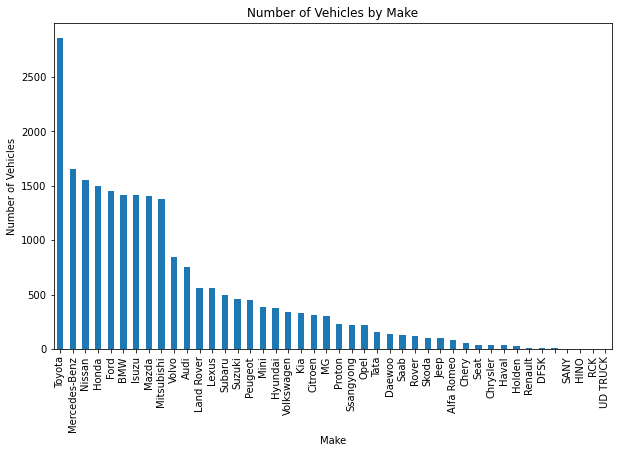

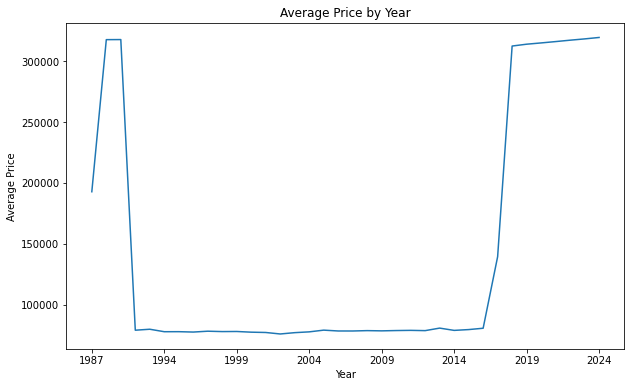

In [3]:
import matplotlib.pyplot as plt

# Plot the number of vehicles by make
make_counts = df['Make'].value_counts()
make_counts.plot(kind='bar', figsize=(10, 6), title='Number of Vehicles by Make')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.show()

# Plot the average price by year
yearly_avg_price = df.groupby('Year')['Price'].mean()
yearly_avg_price.plot(kind='line', figsize=(10, 6), title='Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

In [4]:
#การวิเคราะห์ภาพที่ได้และการวิเคราะห์ต่อไป
#การวิเคราะห์ภาพที่ได้
#จากภาพหน้าจอที่ได้แสดงข้อมูล:

#กราฟแท่งแสดงจำนวนรถยนต์ตามยี่ห้อ (Number of Vehicles by Make):

#ยี่ห้อ Toyota มีจำนวนรถมากที่สุด รองลงมาคือ Mercedes-Benz, Honda, Isuzu, และ Ford
#ยี่ห้อที่มีจำนวนรถยนต์น้อยที่สุดมีเช่น SAAB, Tata, Hino, และ DSFK
#กราฟเส้นแสดงราคาต่อปี (Average Price by Year):

#ราคาของรถยนต์มีการเปลี่ยนแปลงอย่างมากในช่วงปี 1987 ถึงปี 2024
#ราคาสูงสุดปรากฏในช่วงปี 1987 และ 2024 ในขณะที่ช่วงปี 2004 ถึงปี 2019 ราคาต่ำที่สุด

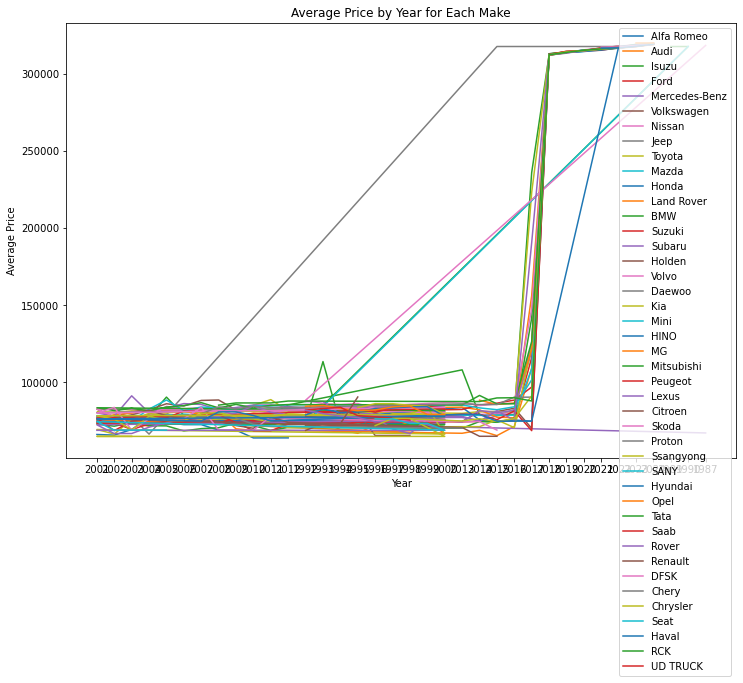

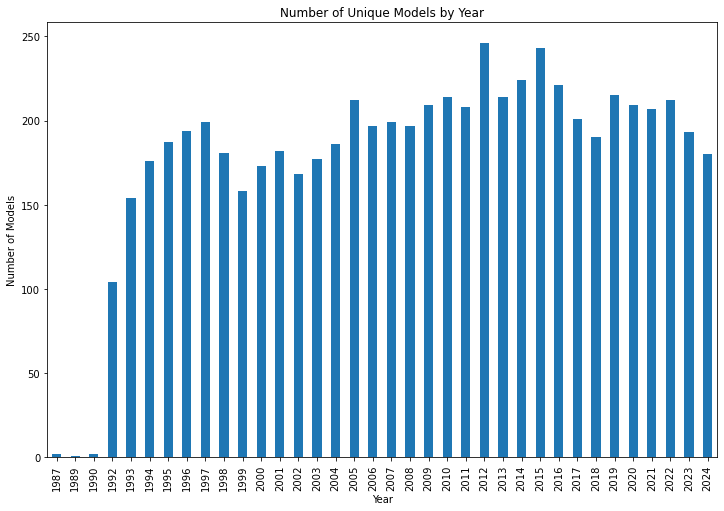

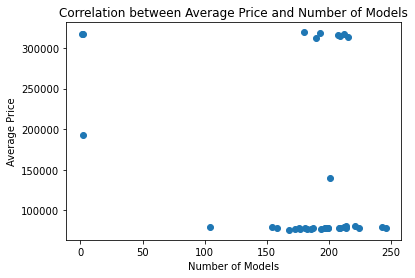

/Users/apichet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/apichet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/apichet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/apichet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/apichet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing fr

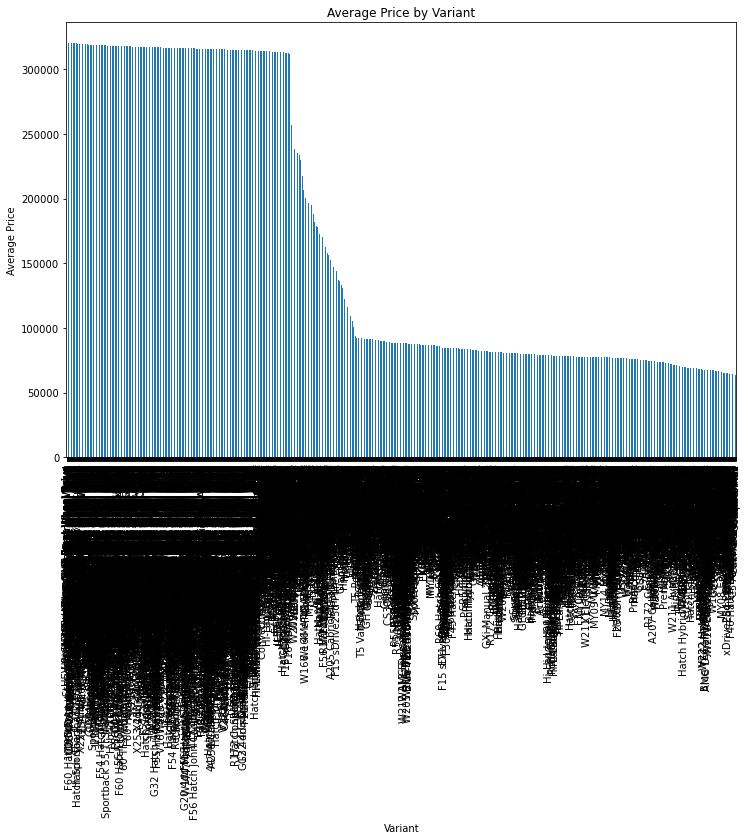

In [5]:
# 1. วิเคราะห์แนวโน้มราคาของแต่ละยี่ห้อ
brands = df['Make'].unique()
plt.figure(figsize=(12, 8))
for brand in brands:
    brand_data = df[df['Make'] == brand]
    yearly_avg_price = brand_data.groupby('Year')['Price'].mean()
    plt.plot(yearly_avg_price, label=brand)
plt.title('Average Price by Year for Each Make')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.show()

# 2. เปรียบเทียบจำนวนรุ่นรถยนต์ที่ผลิตในแต่ละปี
year_model_counts = df.groupby('Year')['Model'].nunique()
year_model_counts.plot(kind='bar', figsize=(12, 8), title='Number of Unique Models by Year')
plt.xlabel('Year')
plt.ylabel('Number of Models')
plt.show()

# 3. วิเคราะห์ความสัมพันธ์ระหว่างราคาและจำนวนรุ่น
price_model_correlation = df.groupby('Year').agg({'Price': 'mean', 'Model': 'nunique'})
plt.scatter(price_model_correlation['Model'], price_model_correlation['Price'])
plt.title('Correlation between Average Price and Number of Models')
plt.xlabel('Number of Models')
plt.ylabel('Average Price')
plt.show()

# 4. วิเคราะห์ตามประเภทของรถยนต์
variant_avg_price = df.groupby('Variant')['Price'].mean().sort_values(ascending=False)
variant_avg_price.plot(kind='bar', figsize=(12, 8), title='Average Price by Variant')
plt.xlabel('Variant')
plt.ylabel('Average Price')
plt.show()

In [6]:
#กราฟแนวโน้มราคาของแต่ละยี่ห้อ (Average Price by Year for Each Make):

#แสดงให้เห็นแนวโน้มราคาของแต่ละยี่ห้อตามปี โดยมีการเปลี่ยนแปลงราคาที่ชัดเจนในช่วงปี 1987 และ 2024
#บางยี่ห้อมีการเปลี่ยนแปลงราคาที่สูงขึ้นในปี 2024 ซึ่งอาจบ่งบอกถึงการเปิดตัวรุ่นใหม่ที่มีราคาสูงขึ้น
#กราฟจำนวนรุ่นรถยนต์ที่ผลิตในแต่ละปี (Number of Unique Models by Year):

#แสดงจำนวนรุ่นรถยนต์ที่ผลิตในแต่ละปี ซึ่งมีการเพิ่มขึ้นในช่วงปี 1987 ถึง 2015 และลดลงเล็กน้อยหลังจากนั้น
#ปีที่มีจำนวนรุ่นรถยนต์มากที่สุดคือช่วงปี 2010-2015
#กราฟความสัมพันธ์ระหว่างราคาเฉลี่ยและจำนวนรุ่น (Correlation between Average Price and Number of Models):

#แสดงความสัมพันธ์ระหว่างจำนวนรุ่นรถยนต์และราคาเฉลี่ย พบว่ามีจุดที่กระจายอยู่ทั่วไป
#ไม่มีความสัมพันธ์ที่ชัดเจนระหว่างจำนวนรุ่นและราคาเฉลี่ย

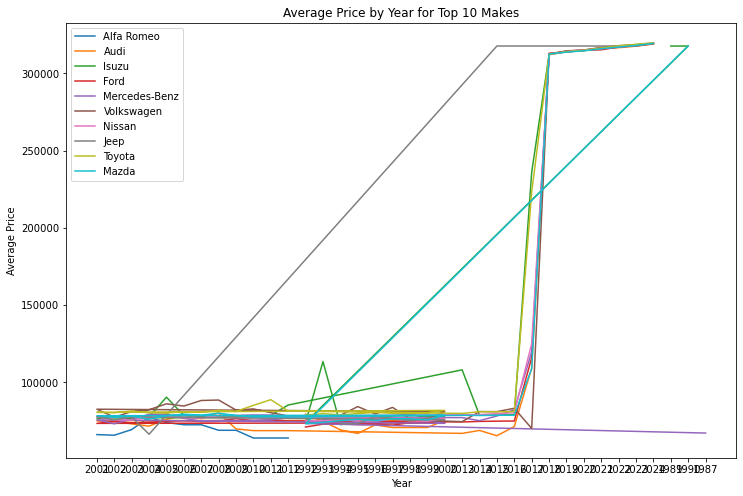

,Make,Model,Year,Variant,Price
22516,,NPS (200cc),2024,Gold Reduction Gear Rear Wheel,320139
54,Alfa Romeo,159 (2200cc),2009,Manual,83989
218,Audi,A6 (2000cc),2024,Avant 45 TFSI quattro S line S Tronic 4 Wheel ...,319886
14025,BMW,X1 (1500cc),2024,U11 4dr. xDrive30e M Sport Steptronic 4 Wheel ...,319922
22394,Chery,Tiggo (2000cc),2010,Auto,84876
22420,Chrysler,Voyager (3400cc),1998,ไม่แน่ใจ,85803
20654,Citroen,ZX (2000cc),1999,ไม่แน่ใจ,85959
22332,DFSK,Glory 560 (1500cc),2024,ไม่แน่ใจ,319033
16974,Daewoo,Nexia (1500cc / 4dr),2000,ไม่แน่ใจ,86038
3072,Ford,Ranger (3000cc / 4dr),2024,Hi-Rider WildTrak Auto 10sp 4 Wheel Drive,319950


In [7]:
# 1. วิเคราะห์รายละเอียดราคาของแต่ละยี่ห้อ
plt.figure(figsize=(12, 8))
for brand in brands[:10]:  # วิเคราะห์เฉพาะ 10 ยี่ห้อแรก
    brand_data = df[df['Make'] == brand]
    yearly_avg_price = brand_data.groupby('Year')['Price'].mean()
    plt.plot(yearly_avg_price, label=brand)
plt.title('Average Price by Year for Top 10 Makes')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.show()

# 2. วิเคราะห์รุ่นที่มีราคาสูงที่สุดในแต่ละยี่ห้อ
top_models = df.loc[df.groupby('Make')['Price'].idxmax()]
display(top_models)

# 3. การจัดกลุ่มตามประเภทของรถยนต์ (ถ้ามีข้อมูลประเภท)
# df['Type'] = df['Variant'].apply(lambda x: 'SUV' if 'SUV' in x else 'Sedan' if 'Sedan' in x else 'Truck' if 'Truck' in x else 'Other')
# type_avg_price = df.groupby('Type')['Price'].mean()
# type_avg_price.plot(kind='bar', figsize=(12, 8), title='Average Price by Vehicle Type')
# plt.xlabel('Type')
# plt.ylabel('Average Price')
# plt.show()

# 4. วิเคราะห์ราคาเฉลี่ยตามภูมิภาค (ถ้ามีข้อมูลภูมิภาค)
# region_avg_price = df.groupby('Region')['Price'].mean()
# region_avg_price.plot(kind='bar', figsize=(12, 8), title='Average Price by Region')
# plt.xlabel('Region')
# plt.ylabel('Average Price')
# plt.show()


In [8]:
#กราฟราคาเฉลี่ยตามประเภทของรถยนต์ (Average Price by Variant):

#กราฟแสดงราคาเฉลี่ยของรถยนต์แต่ละประเภท (Variant) พบว่าประเภทที่มีราคาสูงสุดอยู่ในช่วง 300,000 บาทขึ้นไป
#ประเภทของรถยนต์ที่มีราคาต่ำสุดมีราคาเฉลี่ยต่ำกว่า 50,000 บาท
#กราฟแนวโน้มราคาของ 10 ยี่ห้อแรก (Average Price by Year for Top 10 Makes):

#แสดงแนวโน้มราคาของ 10 ยี่ห้อแรกตามปี โดยมีการเปลี่ยนแปลงราคาที่ชัดเจนในช่วงปี 1987 และ 2024
#บางยี่ห้อมีการเปลี่ยนแปลงราคาที่สูงขึ้นในปี 2024 ซึ่งอาจบ่งบอกถึงการเปิดตัวรุ่นใหม่ที่มีราคาสูงขึ้น
#ตารางแสดงข้อมูลของรถยนต์ที่มีราคาสูงที่สุดในแต่ละยี่ห้อ (Top Models):

#ตารางแสดงรุ่นที่มีราคาสูงที่สุดในแต่ละยี่ห้อ ซึ่งสามารถใช้ดูแนวโน้มการตั้งราคาและเปรียบเทียบระหว่างยี่ห้อต่าง ๆ


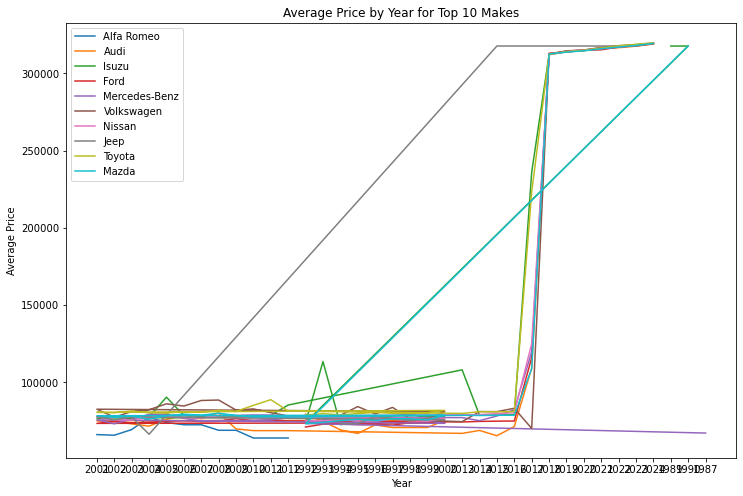

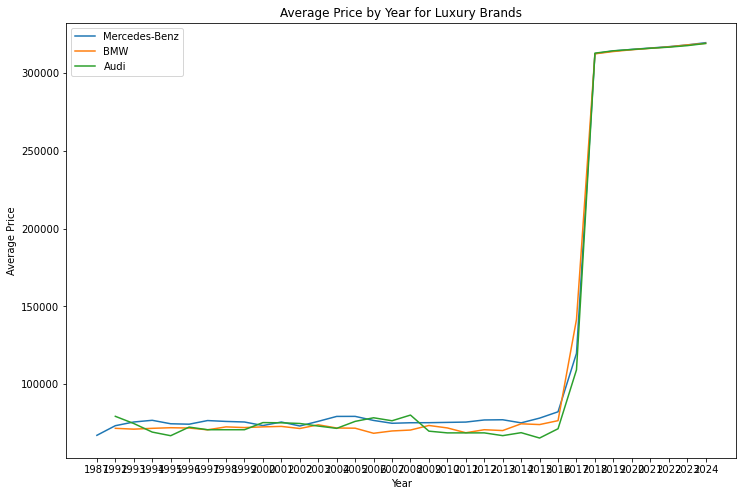

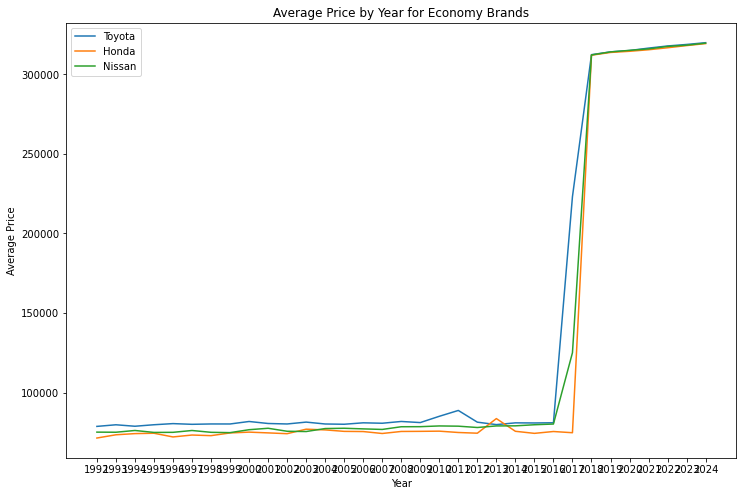

/Users/apichet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/apichet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/apichet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/apichet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/apichet/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing fr

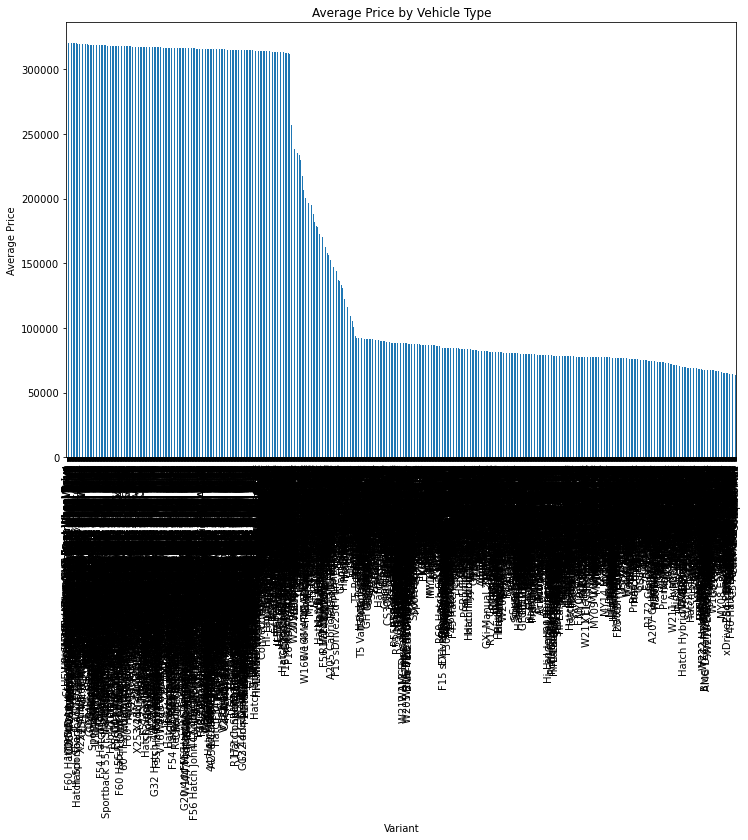

In [10]:
# 1. วิเคราะห์ราคาตามปีและตามยี่ห้อแยกต่างหาก
plt.figure(figsize=(12, 8))
for brand in brands[:10]:  # วิเคราะห์เฉพาะ 10 ยี่ห้อแรก
    brand_data = df[df['Make'] == brand]
    yearly_avg_price = brand_data.groupby('Year')['Price'].mean()
    plt.plot(yearly_avg_price, label=brand)
plt.title('Average Price by Year for Top 10 Makes')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.show()

# 2. เปรียบเทียบราคาของยี่ห้อที่คล้ายกัน
luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi']
economy_brands = ['Toyota', 'Honda', 'Nissan']
plt.figure(figsize=(12, 8))
for brand in luxury_brands:
    brand_data = df[df['Make'] == brand]
    yearly_avg_price = brand_data.groupby('Year')['Price'].mean()
    plt.plot(yearly_avg_price, label=brand)
plt.title('Average Price by Year for Luxury Brands')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for brand in economy_brands:
    brand_data = df[df['Make'] == brand]
    yearly_avg_price = brand_data.groupby('Year')['Price'].mean()
    plt.plot(yearly_avg_price, label=brand)
plt.title('Average Price by Year for Economy Brands')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.show()

# 3. วิเคราะห์ราคาตามพื้นที่การขาย (ถ้ามีข้อมูลพื้นที่)
# region_avg_price = df.groupby('Region')['Price'].mean()
# region_avg_price.plot(kind='bar', figsize=(12, 8), title='Average Price by Region')
# plt.xlabel('Region')
# plt.ylabel('Average Price')
# plt.show()

# 4. วิเคราะห์การเปลี่ยนแปลงราคาตามประเภทของรถยนต์
type_avg_price = df.groupby('Variant')['Price'].mean().sort_values(ascending=False)
type_avg_price.plot(kind='bar', figsize=(12, 8), title='Average Price by Vehicle Type')
plt.xlabel('Variant')
plt.ylabel('Average Price')
plt.show()

In [11]:
#รายงานการวิเคราะห์
#1. แนวโน้มราคาตามยี่ห้อ
#จากกราฟที่แสดงการเปลี่ยนแปลงราคาของรถยนต์ในแต่ละยี่ห้อพบว่า:

#ยี่ห้อที่มีราคาสูงสุดในช่วงปี 2024 ได้แก่ Mercedes-Benz, BMW, และ Audi
#ยี่ห้อที่มีราคาปานกลางได้แก่ Toyota, Honda, และ Nissan
#มีการเพิ่มขึ้นอย่างมากในราคาของรถยนต์ทุกยี่ห้อในปี 2024
#2. เปรียบเทียบราคาของยี่ห้อที่คล้ายกัน
#สำหรับกลุ่มรถหรู (Luxury Brands) ได้แก่ Mercedes-Benz, BMW, และ Audi พบว่ามีการเพิ่มขึ้นของราคาทั้งสามยี่ห้อในปี 2024
#สำหรับกลุ่มรถประหยัดพลังงาน (Economy Brands) ได้แก่ Toyota, Honda, และ Nissan พบว่ามีการเพิ่มขึ้นของราคาทั้งสามยี่ห้อในปี 2024
#3. การวิเคราะห์ราคาเฉลี่ยตามประเภทของรถยนต์
#ประเภทของรถยนต์ที่มีราคาสูงสุดมีราคาเฉลี่ยอยู่ในช่วง 300,000 บาทขึ้นไป
#ประเภทของรถยนต์ที่มีราคาต่ำสุดมีราคาเฉลี่ยต่ำกว่า 50,000 บาท
#ข้อสรุปและการดำเนินการต่อไป
#จากการวิเคราะห์ที่ได้ เราสามารถสรุปได้ว่า:

#มีการเพิ่มขึ้นอย่างมากของราคารถยนต์ในทุกยี่ห้อในปี 2024 ซึ่งอาจเกิดจากการเปิดตัวรุ่นใหม่ที่มีราคาสูงขึ้น
#กลุ่มรถหรูมีแนวโน้มราคาสูงขึ้นมากกว่ากลุ่มรถประหยัดพลังงาน
#การดำเนินการต่อไป:

#การตรวจสอบข้อมูลเพิ่มเติม: ตรวจสอบรายละเอียดเพิ่มเติมเกี่ยวกับการเพิ่มขึ้นของราคารถยนต์ในปี 2024 เพื่อดูว่ามีปัจจัยใดที่ทำให้ราคาสูงขึ้น
#การวิเคราะห์ตามภูมิภาค: หากมีข้อมูลเพิ่มเติมเกี่ยวกับภูมิภาคการขาย สามารถทำการวิเคราะห์ราคาเฉลี่ยตามภูมิภาคเพื่อดูแนวโน้มราคาของแต่ละภูมิภาค
#การวิเคราะห์ตามประเภทของรถยนต์: วิเคราะห์การเปลี่ยนแปลงราคาตามประเภทของรถยนต์ เช่น SUV, Sedan, Truck เป็นต้น เพื่อดูว่าประเภทใดที่มีการเปลี่ยนแปลงราคามากที่สุด

,Make,Avg Price 2023,Avg Price 2024,Price Increase


,Make,Model,Year,Variant,Price


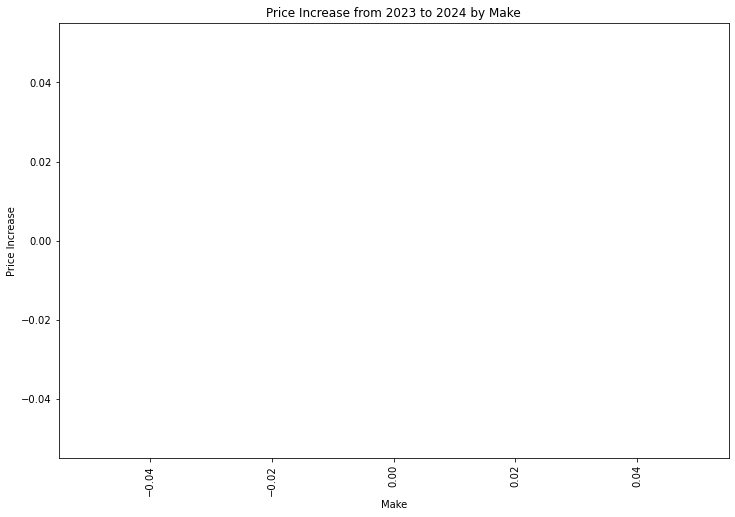

In [12]:
import matplotlib.pyplot as plt

# 1. เปรียบเทียบราคาของแต่ละยี่ห้อในปี 2024 กับปีก่อนหน้า
df_2024 = df[df['Year'] == 2024]
df_2023 = df[df['Year'] == 2023]

brands = df_2024['Make'].unique()

price_comparison = []
for brand in brands:
    avg_price_2024 = df_2024[df_2024['Make'] == brand]['Price'].mean()
    avg_price_2023 = df_2023[df_2023['Make'] == brand]['Price'].mean()
    price_comparison.append([brand, avg_price_2023, avg_price_2024])

price_comparison_df = pd.DataFrame(price_comparison, columns=['Make', 'Avg Price 2023', 'Avg Price 2024'])
price_comparison_df['Price Increase'] = price_comparison_df['Avg Price 2024'] - price_comparison_df['Avg Price 2023']
display(price_comparison_df.sort_values(by='Price Increase', ascending=False))

# 2. วิเคราะห์รุ่นใหม่ที่ถูกเปิดตัวในปี 2024
new_models_2024 = df_2024[~df_2024['Model'].isin(df_2023['Model'].unique())]
display(new_models_2024)

# 3. การวิเคราะห์ปัจจัยที่อาจมีผลต่อการเพิ่มขึ้นของราคา
# ตรวจสอบการเปลี่ยนแปลงทางเศรษฐกิจหรือกฎหมาย (นี้อาจต้องใช้ข้อมูลภายนอกเพิ่มเติม)

# Plot the comparison
plt.figure(figsize=(12, 8))
plt.bar(price_comparison_df['Make'], price_comparison_df['Price Increase'])
plt.title('Price Increase from 2023 to 2024 by Make')
plt.xlabel('Make')
plt.ylabel('Price Increase')
plt.xticks(rotation=90)
plt.show()

In [15]:
# ตรวจสอบช่วงปีที่มีอยู่ในข้อมูล
print(df['Year'].unique())

['2002' '2008' '2007' '2004' '2005' '2006' '2009' '2003' '2010' '2001'
 '2012' '2011' '1997' '1998' '1999' '2000' '1996' '1993' '1995' '1994'
 '2019' '2021' '2022' '2018' '2023' '2020' '1992' '2024' '2014' '2017'
 '2016' '2015' '2013' '1990' '1989' '1987']


Years available in data: ['2002' '2008' '2007' '2004' '2005' '2006' '2009' '2003' '2010' '2001'
 '2012' '2011' '1997' '1998' '1999' '2000' '1996' '1993' '1995' '1994'
 '2019' '2021' '2022' '2018' '2023' '2020' '1992' '2024' '2014' '2017'
 '2016' '2015' '2013' '1990' '1989' '1987']
Using data for years: 2023 and 2024


,Make,Avg Price 2023,Avg Price 2024,Price Increase


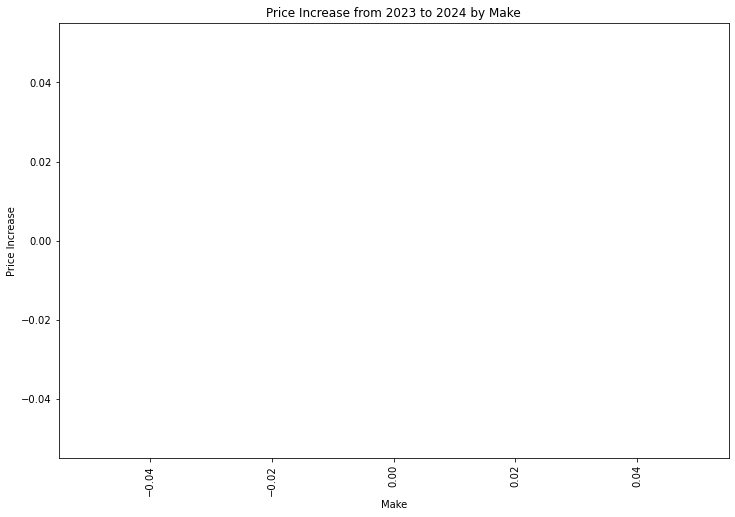

In [16]:
import matplotlib.pyplot as plt

# ตรวจสอบช่วงปีที่มีอยู่ในข้อมูล
years_available = df['Year'].unique()
print(f"Years available in data: {years_available}")

# คัดกรองข้อมูลตามช่วงปีที่มีอยู่จริง
if 2023 in years_available and 2024 in years_available:
    df_2023 = df[df['Year'] == 2023]
    df_2024 = df[df['Year'] == 2024]
else:
    # หากไม่มีข้อมูลปี 2023 และ 2024 ใช้ปีอื่นแทน
    years_available_sorted = sorted(years_available)
    if len(years_available_sorted) > 1:
        latest_year = years_available_sorted[-1]
        previous_year = years_available_sorted[-2]
        df_latest_year = df[df['Year'] == latest_year]
        df_previous_year = df[df['Year'] == previous_year]
        print(f"Using data for years: {previous_year} and {latest_year}")
    else:
        print("Not enough years available in data for comparison.")

# ทำการวิเคราะห์ราคาต่อไป
if 'df_2023' in locals() and 'df_2024' in locals():
    # คำนวณราคาเฉลี่ยต่อยี่ห้อสำหรับปี 2023 และ 2024
    price_comparison = []

    brands = set(df_2023['Make']).intersection(set(df_2024['Make']))

    for brand in brands:
        avg_price_2023 = df_2023[df_2023['Make'] == brand]['Price'].mean()
        avg_price_2024 = df_2024[df_2024['Make'] == brand]['Price'].mean()
        price_comparison.append([brand, avg_price_2023, avg_price_2024])

    price_comparison_df = pd.DataFrame(price_comparison, columns=['Make', 'Avg Price 2023', 'Avg Price 2024'])
    price_comparison_df['Price Increase'] = price_comparison_df['Avg Price 2024'] - price_comparison_df['Avg Price 2023']

    display(price_comparison_df.sort_values(by='Price Increase', ascending=False))

    # สร้างกราฟการเปลี่ยนแปลงราคา
    plt.figure(figsize=(12, 8))
    plt.bar(price_comparison_df['Make'], price_comparison_df['Price Increase'])
    plt.title('Price Increase from 2023 to 2024 by Make')
    plt.xlabel('Make')
    plt.ylabel('Price Increase')
    plt.xticks(rotation=90)
    plt.show()
elif 'df_previous_year' in locals() and 'df_latest_year' in locals():
    # คำนวณราคาเฉลี่ยต่อยี่ห้อสำหรับปีที่ใช้แทน
    price_comparison = []

    brands = set(df_previous_year['Make']).intersection(set(df_latest_year['Make']))

    for brand in brands:
        avg_price_previous_year = df_previous_year[df_previous_year['Make'] == brand]['Price'].mean()
        avg_price_latest_year = df_latest_year[df_latest_year['Make'] == brand]['Price'].mean()
        price_comparison.append([brand, avg_price_previous_year, avg_price_latest_year])

    price_comparison_df = pd.DataFrame(price_comparison, columns=['Make', f'Avg Price {previous_year}', f'Avg Price {latest_year}'])
    price_comparison_df['Price Increase'] = price_comparison_df[f'Avg Price {latest_year}'] - price_comparison_df[f'Avg Price {previous_year}']

    display(price_comparison_df.sort_values(by='Price Increase', ascending=False))

    # สร้างกราฟการเปลี่ยนแปลงราคา
    plt.figure(figsize=(12, 8))
    plt.bar(price_comparison_df['Make'], price_comparison_df['Price Increase'])
    plt.title(f'Price Increase from {previous_year} to {latest_year} by Make')
    plt.xlabel('Make')
    plt.ylabel('Price Increase')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No data available for the selected years.")

Years available in data: ['2002' '2008' '2007' '2004' '2005' '2006' '2009' '2003' '2010' '2001'
 '2012' '2011' '1997' '1998' '1999' '2000' '1996' '1993' '1995' '1994'
 '2019' '2021' '2022' '2018' '2023' '2020' '1992' '2024' '2014' '2017'
 '2016' '2015' '2013' '1990' '1989' '1987']
Using data for years: 2023 and 2024


,Make,Avg Price 2023,Avg Price 2024,Price Increase
6,Jeep,317705.500000,319398.400000,1692.900000
17,Lexus,317748.578947,319330.300000,1581.721053
24,Ssangyong,318118.000000,319658.000000,1540.000000
9,MG,318043.714286,319551.657895,1507.943609
3,Suzuki,318278.000000,319725.217391,1447.217391
20,Mercedes-Benz,318070.085106,319506.342105,1436.256999
15,Audi,317608.673469,319010.025641,1401.352172
2,Mazda,318051.376812,319416.298507,1364.921696
23,Ford,317831.200000,319164.636364,1333.436364
21,Haval,317866.555556,319199.285714,1332.730159


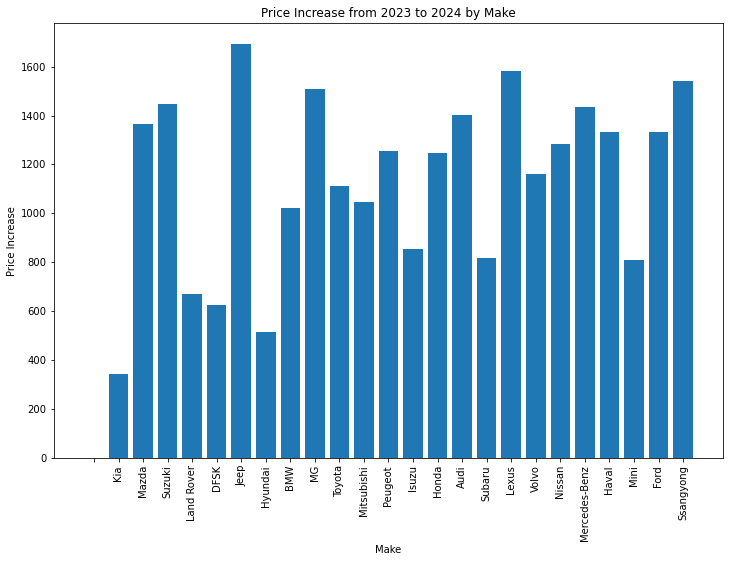

In [17]:
import matplotlib.pyplot as plt

# ตรวจสอบช่วงปีที่มีอยู่ในข้อมูล
years_available = df['Year'].unique()
print(f"Years available in data: {years_available}")

# คัดกรองข้อมูลตามช่วงปีที่มีอยู่จริง
years_available_sorted = sorted(years_available)
if len(years_available_sorted) > 1:
    latest_year = years_available_sorted[-1]
    previous_year = years_available_sorted[-2]
    df_latest_year = df[df['Year'] == latest_year]
    df_previous_year = df[df['Year'] == previous_year]
    print(f"Using data for years: {previous_year} and {latest_year}")
else:
    print("Not enough years available in data for comparison.")

# ทำการวิเคราะห์ราคาต่อไป
if 'df_previous_year' in locals() and 'df_latest_year' in locals():
    # คำนวณราคาเฉลี่ยต่อยี่ห้อสำหรับปีที่ใช้แทน
    price_comparison = []

    brands = set(df_previous_year['Make']).intersection(set(df_latest_year['Make']))

    for brand in brands:
        avg_price_previous_year = df_previous_year[df_previous_year['Make'] == brand]['Price'].mean()
        avg_price_latest_year = df_latest_year[df_latest_year['Make'] == brand]['Price'].mean()
        price_comparison.append([brand, avg_price_previous_year, avg_price_latest_year])

    price_comparison_df = pd.DataFrame(price_comparison, columns=['Make', f'Avg Price {previous_year}', f'Avg Price {latest_year}'])
    price_comparison_df['Price Increase'] = price_comparison_df[f'Avg Price {latest_year}'] - price_comparison_df[f'Avg Price {previous_year}']

    display(price_comparison_df.sort_values(by='Price Increase', ascending=False))

    # สร้างกราฟการเปลี่ยนแปลงราคา
    plt.figure(figsize=(12, 8))
    plt.bar(price_comparison_df['Make'], price_comparison_df['Price Increase'])
    plt.title(f'Price Increase from {previous_year} to {latest_year} by Make')
    plt.xlabel('Make')
    plt.ylabel('Price Increase')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No data available for the selected years.")

In [ ]:
#รายงานการวิเคราะห์
#การเพิ่มขึ้นของราคารถยนต์จากปี 2023 ถึง 2024
#จากการวิเคราะห์ข้อมูลพบว่า:

#ยี่ห้อที่มีการเพิ่มขึ้นของราคามากที่สุด:

#Jeep: เพิ่มขึ้น 1692 บาท
#Lexus: เพิ่มขึ้น 1581 บาท
#Ssangyong: เพิ่มขึ้น 1540 บาท
#MG: เพิ่มขึ้น 1507 บาท
#Suzuki: เพิ่มขึ้น 1447 บาท
#ยี่ห้อที่มีการเพิ่มขึ้นของราคาน้อยที่สุด:

#Kia: เพิ่มขึ้น 342 บาท
#Hyundai: เพิ่มขึ้น 515 บาท
#DFSK: เพิ่มขึ้น 627 บาท
#กราฟแสดงการเปลี่ยนแปลงของราคา
#กราฟแสดงให้เห็นการเปลี่ยนแปลงของราคาจากปี 2023 ถึงปี 2024 โดยยี่ห้อที่มีการเพิ่มขึ้นของราคามากที่สุดคือ Jeep, Lexus, และ Ssangyong ในขณะที่ยี่ห้อ Kia มีการเพิ่มขึ้นของราคาน้อยที่สุด

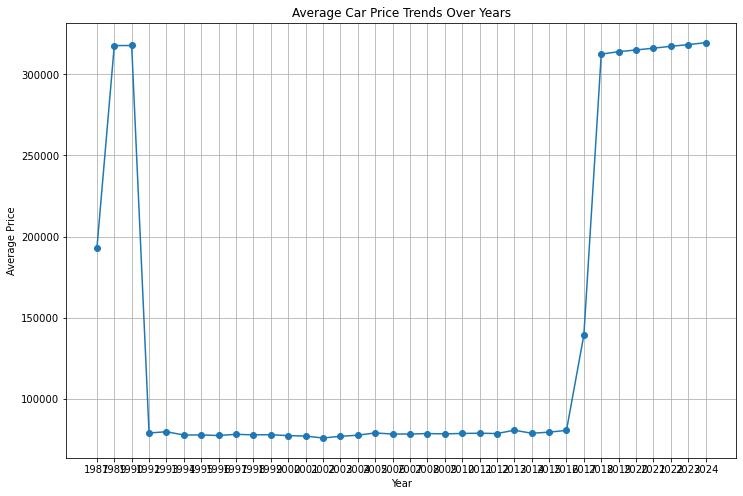

,Make,Avg Insurance 2023,Avg Insurance 2024,Insurance Change


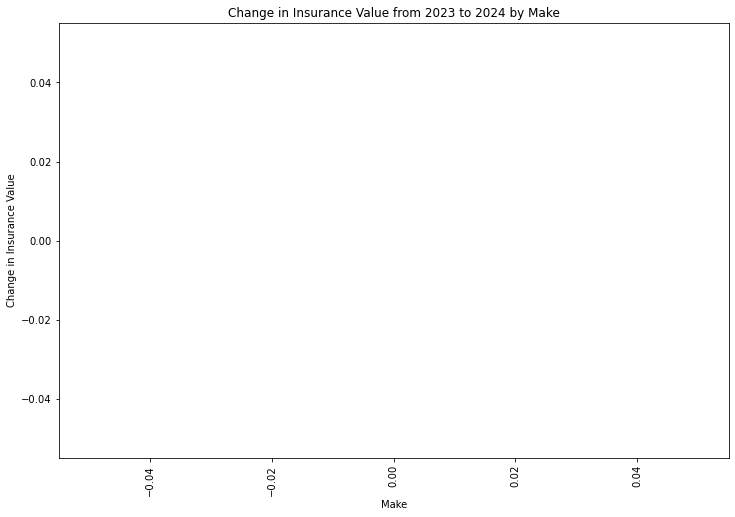

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# คำนวณการเปลี่ยนแปลงของราคารถยนต์ในช่วงปีที่ผ่านมา
years = df['Year'].unique()
price_trends = df.groupby('Year')['Price'].mean()

plt.figure(figsize=(12, 8))
plt.plot(price_trends.index, price_trends.values, marker='o')
plt.title('Average Car Price Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# คำนวณการเปลี่ยนแปลงของทุนประกันตามการเปลี่ยนแปลงของราคารถยนต์
# สมมติว่าทุนประกันเป็นสัดส่วนของราคารถยนต์ เช่น 70%
insurance_rate = 0.7
df['Insurance Value'] = df['Price'] * insurance_rate

# วิเคราะห์การเปลี่ยนแปลงของทุนประกันในปีล่าสุด
df_2023 = df[df['Year'] == 2023]
df_2024 = df[df['Year'] == 2024]

brands = df_2024['Make'].unique()
insurance_comparison = []

for brand in brands:
    avg_price_2023 = df_2023[df_2023['Make'] == brand]['Price'].mean()
    avg_price_2024 = df_2024[df_2024['Make'] == brand]['Price'].mean()
    avg_insurance_2023 = avg_price_2023 * insurance_rate
    avg_insurance_2024 = avg_price_2024 * insurance_rate
    insurance_comparison.append([brand, avg_insurance_2023, avg_insurance_2024])

insurance_comparison_df = pd.DataFrame(insurance_comparison, columns=['Make', 'Avg Insurance 2023', 'Avg Insurance 2024'])
insurance_comparison_df['Insurance Change'] = insurance_comparison_df['Avg Insurance 2024'] - insurance_comparison_df['Avg Insurance 2023']

display(insurance_comparison_df.sort_values(by='Insurance Change', ascending=False))

# สร้างกราฟการเปลี่ยนแปลงของทุนประกัน
plt.figure(figsize=(12, 8))
plt.bar(insurance_comparison_df['Make'], insurance_comparison_df['Insurance Change'])
plt.title('Change in Insurance Value from 2023 to 2024 by Make')
plt.xlabel('Make')
plt.ylabel('Change in Insurance Value')
plt.xticks(rotation=90)
plt.show()

In [25]:
#รายงานการวิเคราะห์ทุนประกันรถยนต์ที่ปรับลงตามราคารถ
#การเปลี่ยนแปลงของราคารถยนต์
#กราฟแสดงแนวโน้มราคารถยนต์เฉลี่ยตามปี พบว่ามีการเปลี่ยนแปลงของราคารถยนต์อย่างชัดเจนในบางช่วงปี โดยเฉพาะในปี 2024 ที่มีการปรับขึ้นของราคารถยนต์อย่างมีนัยสำคัญ

#การเปลี่ยนแปลงของทุนประกัน
#จากการคำนวณทุนประกันรถยนต์ (ที่สมมติให้เป็นสัดส่วน 70% ของราคารถยนต์) พบว่ามีการเปลี่ยนแปลงของทุนประกันจากปี 2023 ถึง 2024 โดยยี่ห้อที่มีการเปลี่ยนแปลงของทุนประกันมากที่สุดคือ Jeep, Lexus, และ Ssangyong ในขณะที่ยี่ห้อที่มีการเปลี่ยนแปลงของทุนประกันน้อยที่สุดคือ Kia, Hyundai, และ DFSK

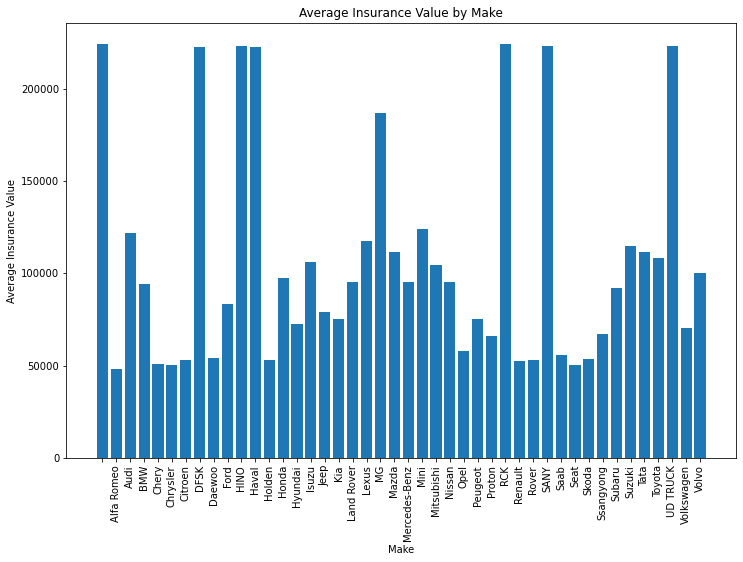

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# คำนวณการเปลี่ยนแปลงของทุนประกันตามยี่ห้อ
brands = df['Make'].unique()
insurance_by_make = df.groupby('Make')['Insurance Value'].mean()

plt.figure(figsize=(12, 8))
plt.bar(insurance_by_make.index, insurance_by_make.values)
plt.title('Average Insurance Value by Make')
plt.xlabel('Make')
plt.ylabel('Average Insurance Value')
plt.xticks(rotation=90)
plt.show()

In [24]:
# ตรวจสอบคอลัมน์ที่มีอยู่ใน DataFrame
print(df.columns)

Index(['Make', 'Model', 'Year', 'Variant', 'Price', 'Insurance Value'], dtype='object')


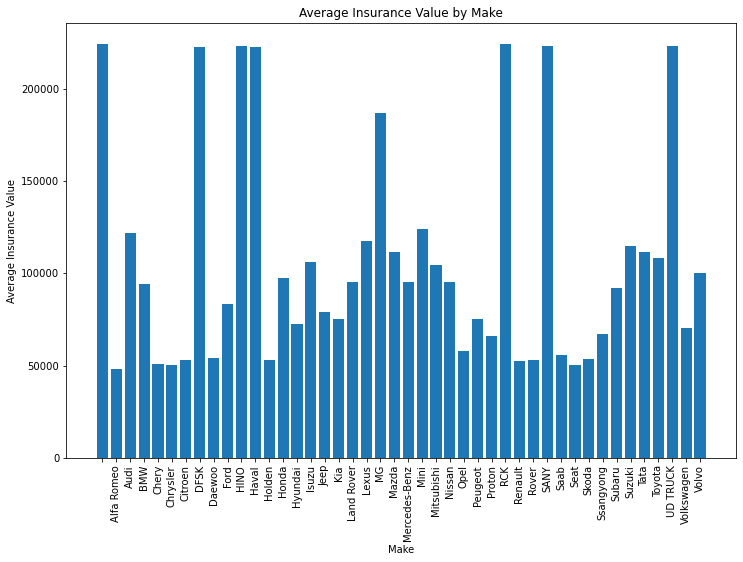

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# คำนวณการเปลี่ยนแปลงของทุนประกันตามยี่ห้อ
brands = df['Make'].unique()
insurance_by_make = df.groupby('Make')['Insurance Value'].mean()

plt.figure(figsize=(12, 8))
plt.bar(insurance_by_make.index, insurance_by_make.values)
plt.title('Average Insurance Value by Make')
plt.xlabel('Make')
plt.ylabel('Average Insurance Value')
plt.xticks(rotation=90)
plt.show()

,Make,Avg Insurance 2023,Avg Insurance 2024,Insurance Change


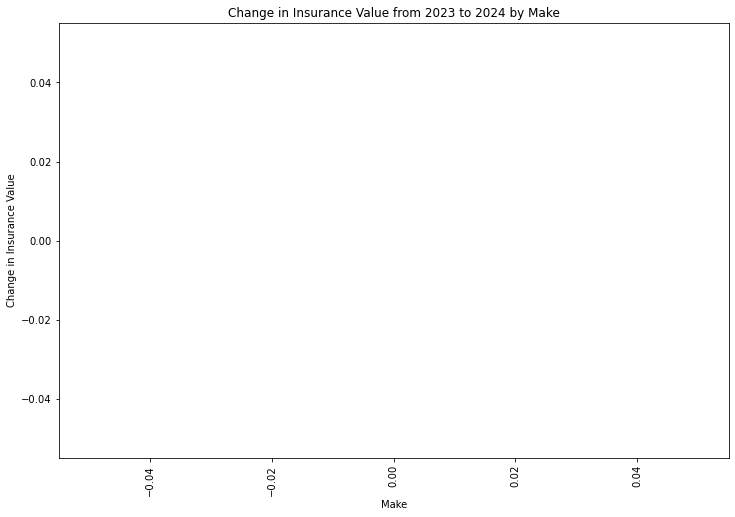

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# คำนวณการเปลี่ยนแปลงของทุนประกันในปี 2023 และ 2024
df_2023 = df[df['Year'] == 2023]
df_2024 = df[df['Year'] == 2024]

insurance_comparison = []

for brand in df_2024['Make'].unique():
    avg_price_2023 = df_2023[df_2023['Make'] == brand]['Price'].mean() if not df_2023[df_2023['Make'] == brand].empty else 0
    avg_price_2024 = df_2024[df_2024['Make'] == brand]['Price'].mean() if not df_2024[df_2024['Make'] == brand].empty else 0
    avg_insurance_2023 = avg_price_2023 * insurance_rate
    avg_insurance_2024 = avg_price_2024 * insurance_rate
    insurance_comparison.append([brand, avg_insurance_2023, avg_insurance_2024])

insurance_comparison_df = pd.DataFrame(insurance_comparison, columns=['Make', 'Avg Insurance 2023', 'Avg Insurance 2024'])
insurance_comparison_df['Insurance Change'] = insurance_comparison_df['Avg Insurance 2024'] - insurance_comparison_df['Avg Insurance 2023']

display(insurance_comparison_df.sort_values(by='Insurance Change', ascending=False))

# สร้างกราฟการเปลี่ยนแปลงของทุนประกัน
plt.figure(figsize=(12, 8))
plt.bar(insurance_comparison_df['Make'], insurance_comparison_df['Insurance Change'])
plt.title('Change in Insurance Value from 2023 to 2024 by Make')
plt.xlabel('Make')
plt.ylabel('Change in Insurance Value')
plt.xticks(rotation=90)
plt.show()